<a href="https://colab.research.google.com/github/iamlorddanny/CNN_waste_segregation_assignment/blob/main/CNN_Assignment_6run.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [1]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import essential libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split

Load the dataset.

In [4]:
import zipfile

# Use raw strings to avoid escape character issues
zip_path = '/content/drive/MyDrive/CNN_assignment/data.zip'
extract_path = '/content/dataset'

# Check and extract the zip file
if os.path.exists(zip_path) and zipfile.is_zipfile(zip_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print(f" Dataset extracted to: {extract_path}")
else:
    print(" Zip file not found or invalid format.")


 Dataset extracted to: /content/dataset


## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [5]:
def load_images_from_directory(base_dir, image_size=(128, 128)):
    images = []
    labels = []

    # Directly iterate through subfolders of base_dir
    for class_name in os.listdir(base_dir):  # Subfolders are class names
        class_path = os.path.join(base_dir, class_name)
        if os.path.isdir(class_path):  # Ensure it's a directory
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                try:
                    img = Image.open(img_path).convert('RGB')  # Make sure image is RGB
                    img = img.resize(image_size)
                    images.append(np.array(img))
                    labels.append(class_name)
                except Exception as e:
                    print(f"❌ Could not process file {img_path}: {e}")

    return images, labels


#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

In [6]:
# Load images and labels

dataset_path = '/content/dataset/data'
image_size = (128, 128)

images, labels = load_images_from_directory(dataset_path, image_size)
images = np.array(images)
labels = np.array(labels)

print(f"Total images loaded: {len(images)}")
print(f"Unique labels found: {set(labels)}")

Total images loaded: 7625
Unique labels found: {np.str_('Metal'), np.str_('Paper'), np.str_('Other'), np.str_('Cardboard'), np.str_('Plastic'), np.str_('Food_Waste'), np.str_('Glass')}


Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

Image data shape: (7625, 128, 128, 3)
First 5 labels: ['Food_Waste' 'Food_Waste' 'Food_Waste' 'Food_Waste' 'Food_Waste']


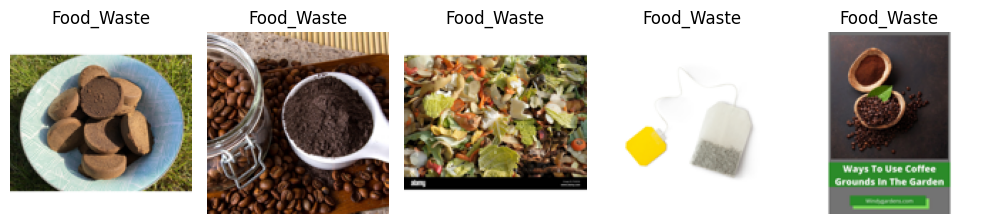

In [7]:
# Convert labels to numpy array (if not already done)
labels = np.array(labels)

# Verify if data looks correct
print(f"Image data shape: {images.shape}")
print(f"First 5 labels: {labels[:5]}")

# Show 5 sample images with labels
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[i].astype('uint8'))  # Ensures correct display
    plt.title(labels[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

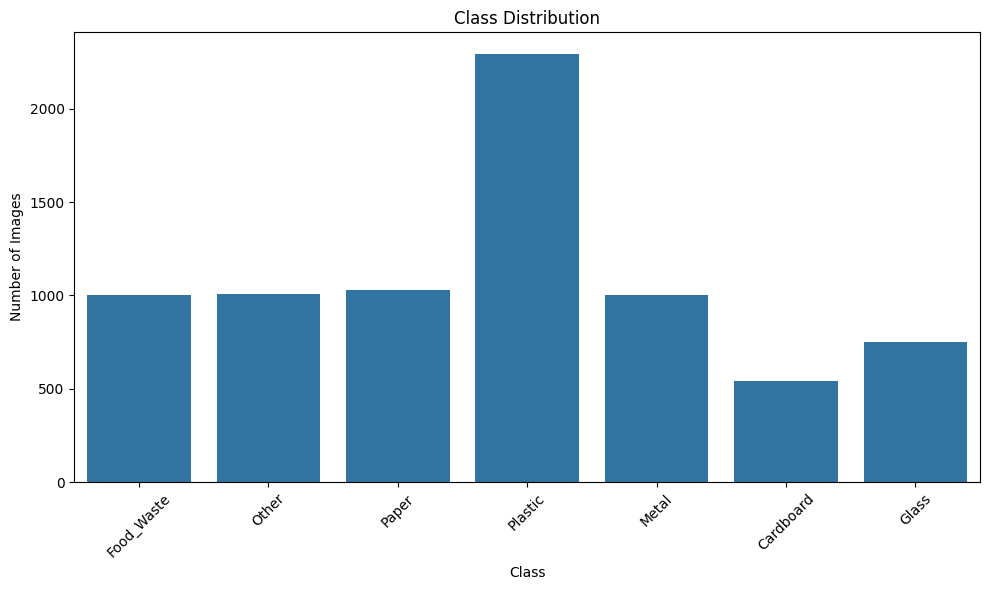

In [8]:
# Visualise Data Distribution

# Convert labels list to a pandas Series for easier plotting
label_series = pd.Series(labels)

# Plot class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x=label_series)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

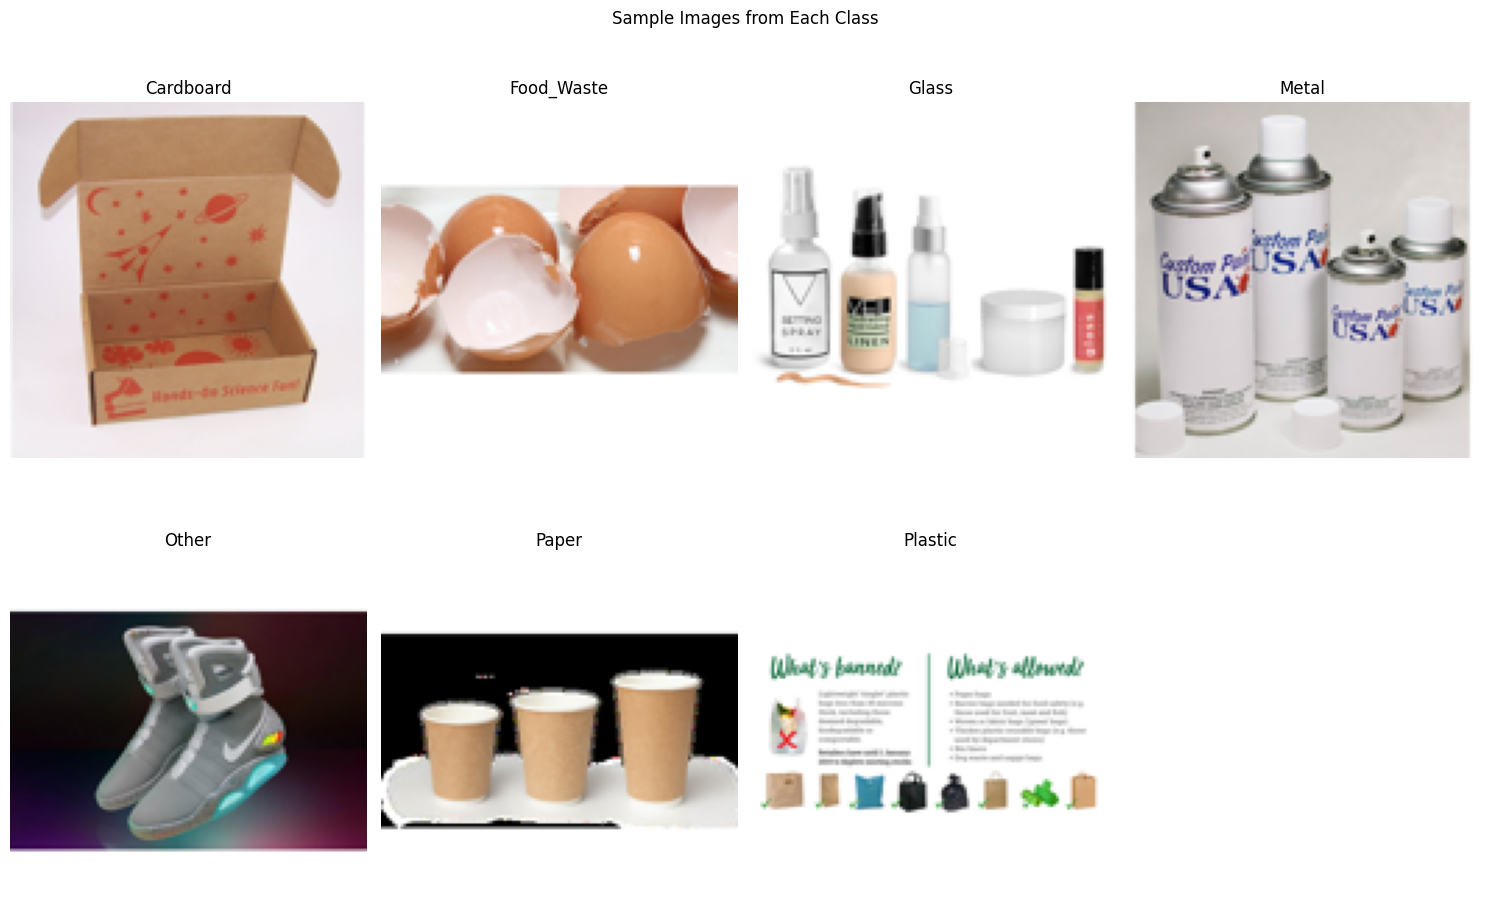

In [9]:
# Visualise Sample Images (across different labels)
import random

# Get unique classes
classes = sorted(set(labels))

# Plot sample images from each class
plt.figure(figsize=(15, 10))
for i, class_name in enumerate(classes):
    # Find indices where label == class_name
    class_indices = [idx for idx, lbl in enumerate(labels) if lbl == class_name]
    img_idx = random.choice(class_indices)

    plt.subplot(2, 4, i+1)  # adjust rows/cols depending on number of classes
    plt.imshow(images[img_idx])
    plt.title(class_name)
    plt.axis('off')

plt.suptitle("Sample Images from Each Class")
plt.tight_layout()
plt.show()



Check for Image size consistency

In [10]:
# Check that all images have the same shape
unique_shapes = set([img.shape for img in images])
print(f"Unique image shapes in dataset: {unique_shapes}")


Unique image shapes in dataset: {(128, 128, 3)}


Flatten all image pixels to view distribution


#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [11]:
# Find the smallest and largest image dimensions from the data set
# Gather width and height of all images
widths = []
heights = []

for img in images:
    h, w = img.shape[:2]
    widths.append(w)
    heights.append(h)

# Find min and max
min_w, max_w = min(widths), max(widths)
min_h, max_h = min(heights), max(heights)

print(f"Smallest image dimensions: ({min_h}, {min_w})")
print(f"Largest image dimensions: ({max_h}, {max_w})")



Smallest image dimensions: (128, 128)
Largest image dimensions: (128, 128)


In [12]:
# Resize the image dimensions
# Resize all images to a consistent shape (128, 128)
resized_images = []

for img in images:
    img_resized = np.array(Image.fromarray((img * 255).astype(np.uint8)).resize(image_size))
    # Normalize the resized image back to [0, 1]
    img_resized = img_resized / 255.0
    resized_images.append(img_resized)

# Convert to numpy array
resized_images = np.array(resized_images)

print(f"All images resized to: {resized_images[0].shape}")



All images resized to: (128, 128, 3)


### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.



We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [13]:
# Encode the labels suitably
# Get unique classes
unique_classes = sorted(set(labels))
label_to_index = {label: idx for idx, label in enumerate(unique_classes)}

# Integer encode the labels
encoded_labels = np.array([label_to_index[label] for label in labels])

print("Label to index mapping:", label_to_index)
print("First 5 encoded labels:", encoded_labels[:5])



Label to index mapping: {np.str_('Cardboard'): 0, np.str_('Food_Waste'): 1, np.str_('Glass'): 2, np.str_('Metal'): 3, np.str_('Other'): 4, np.str_('Paper'): 5, np.str_('Plastic'): 6}
First 5 encoded labels: [1 1 1 1 1]


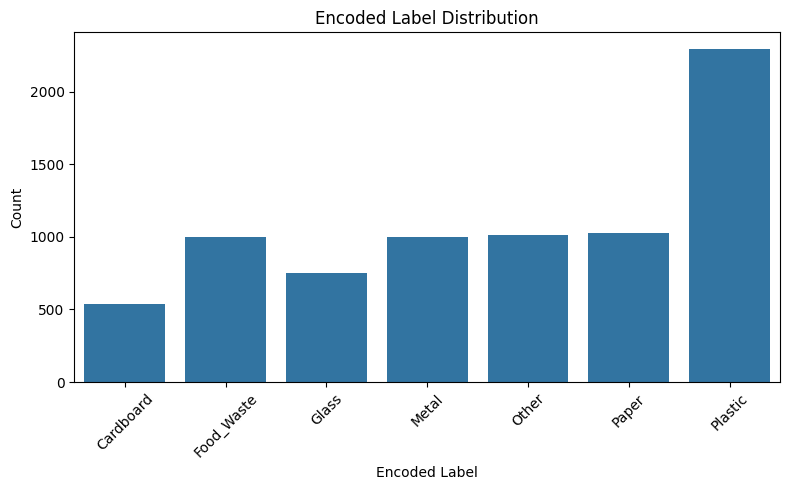

In [14]:
# Integer encoding for labels
unique_classes = sorted(set(labels))
label_to_index = {label: idx for idx, label in enumerate(unique_classes)}
encoded_labels = np.array([label_to_index[label] for label in labels])

# Plot encoded label distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=encoded_labels)
plt.title("Encoded Label Distribution")
plt.xlabel("Encoded Label")
plt.ylabel("Count")
plt.xticks(ticks=range(len(unique_classes)), labels=unique_classes, rotation=45)
plt.tight_layout()
plt.show()


### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [15]:
# Assign specified parts of the dataset to train and validation sets

num_classes = len(unique_classes)
one_hot_labels = np.eye(num_classes)[encoded_labels]

# Split the data
X_train, X_val, y_train, y_val = train_test_split(
    images, one_hot_labels, test_size=0.2, random_state=42, stratify=encoded_labels
)

print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)

Training set shape: (6100, 128, 128, 3) (6100, 7)
Validation set shape: (1525, 128, 128, 3) (1525, 7)


## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import BatchNormalization

# Model 1

In [17]:
# Build and compile the model
model1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.3),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.3),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(7, activation='softmax')
])

model1.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,518,727 (24.87 MB)

 Trainable params: 6,518,279 (24.87 MB)

 Non-trainable params: 448 (1.75 KB)

Add Augmentation to improve generalization

In [18]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 20% for validation
)

train_generator = train_datagen.flow(
    X_train, y_train,
    batch_size=32,
    subset='training'
)

val_generator = train_datagen.flow(
    X_train, y_train,
    batch_size=32,
    subset='validation'
)

#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [19]:
# Compile the model
model1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Callbacks

In [20]:
checkpoint1 = ModelCheckpoint(
    "best_model1.keras",
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

early_stop1 = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

reduce_lr1 = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    verbose=1,
    min_lr=1e-5
)

In [ ]:
# Train the model
history1 = model1.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    callbacks=[checkpoint1, early_stop1, reduce_lr1]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2383 - loss: 8.4701
Epoch 1: val_accuracy improved from -inf to 0.29754, saving model to best_model1.keras
153/153 ━━━━━━━━━━━━━━━━━━━━ 328s 2s/step - accuracy: 0.2384 - loss: 8.4413 - val_accuracy: 0.2975 - val_loss: 2.5084 - learning_rate: 0.0010
Epoch 2/30
 61/153 ━━━━━━━━━━━━━━━━━━━━ 2:52 2s/step - accuracy: 0.3345 - loss: 1.7804

In [ ]:
def plot_history(history):
    plt.figure(figsize=(14, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history1)

# Model 2


In [ ]:

model2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.3),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.3),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(7, activation='softmax')
])

#Model 2 Summary

model2.summary()

In [ ]:
# Training Model 2

# Compile the model1

model2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

checkpoint2 = ModelCheckpoint(
    "best_model2.keras",
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

early_stop2 = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

reduce_lr2 = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    verbose=1,
    min_lr=1e-5
)

In [ ]:
# Train the model2
history2 = model2.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    callbacks=[checkpoint2, early_stop2, reduce_lr2]
)

# Plot History of Model 2
plot_history(history2)


# Model 3

In [ ]:
model3 = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Dropout(0.2),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.3),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.4),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(7, activation='softmax')
])


In [ ]:
model3.summary()


In [ ]:
# Training Model 3

# Compile the model 3

model3.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']

)
checkpoint3 = ModelCheckpoint(
    "best_model3.keras",
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

early_stop3 = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

reduce_lr3 = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    verbose=1,
    min_lr=1e-5
)


In [ ]:

# Train the model3
history3 = model3.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    callbacks=[checkpoint3, early_stop3, reduce_lr3]
)



In [ ]:
# Plot History of Model 3
plot_history(history3)

# Model 4

In [ ]:
# Unsing BatchNormalization to handle data
from tensorflow.keras.layers import BatchNormalization

In [ ]:
#Building Model 4

model4 = Sequential()

# 1st Convolutional Block
model4.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=X_train.shape[1:]))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.2))

# 2nd Convolutional Block
model4.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.3))

# 3rd Convolutional Block
model4.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.4))

# Fully Connected Layers
model4.add(Flatten())
model4.add(Dense(256, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(128, activation='relu'))
model4.add(Dropout(0.3))

# Output Layer
model4.add(Dense(y_train.shape[1], activation='softmax'))

# Compile the model
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model Summary
model4.summary()


In [ ]:
# Compile the model 4

model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint4 = ModelCheckpoint( "best_model4.keras", monitor='val_accuracy', save_best_only=True, verbose=1)

early_stop4 = EarlyStopping( monitor='val_accuracy', patience=5, restore_best_weights=True, verbose=1)

reduce_lr4 = ReduceLROnPlateau( monitor='val_loss', factor=0.2, patience=3, verbose=1, min_lr=1e-5)


In [ ]:

# Train the model4
history4 = model4.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    callbacks=[checkpoint4, early_stop4, reduce_lr4]
)



In [ ]:
# Plot History of Model 4
plot_history(history4)

# Model 5

In [ ]:
from tensorflow.keras.layers import  GlobalAveragePooling2D

In [ ]:


model5 = Sequential()

# Conv Block 1
model5.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)))
model5.add(BatchNormalization())
model5.add(MaxPooling2D((2, 2)))
model5.add(Dropout(0.2))

# Conv Block 2
model5.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D((2, 2)))
model5.add(Dropout(0.3))

# Conv Block 3
model5.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D((2, 2)))
model5.add(Dropout(0.4))

# Replace Flatten with GAP to reduce overfitting
model5.add(GlobalAveragePooling2D())

# Fully connected layers
model5.add(Dense(128, activation='relu'))
model5.add(Dropout(0.4))
model5.add(Dense(num_classes, activation='softmax'))  # Replace `num_classes` with your actual output size

# Compile
model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model5.summary()


In [ ]:
# Define callbacks
checkpoint5 = ModelCheckpoint( 'best_model5.keras', monitor='val_accuracy', save_best_only=True, verbose=1)

earlystop5 = EarlyStopping( monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)

reduce_lr5 = ReduceLROnPlateau( monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6, verbose=1)

callbacks_list = [checkpoint5, earlystop5, reduce_lr5]



In [ ]:
# Train the model
history5 = model5.fit(
    train_generator,
    validation_data=val_generator,
    epochs=40,
    batch_size=32,
    callbacks=callbacks_list,
    verbose=1
)

In [ ]:
# Plot History of Model 5

plot_history(history5)

# Model 6

In [ ]:
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2

In [ ]:

# Build Model 6
model6 = Sequential()

# Conv Block 1
model6.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)))
model6.add(BatchNormalization())
model6.add(MaxPooling2D((2, 2)))
model6.add(Dropout(0.25))

# Conv Block 2
model6.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D((2, 2)))
model6.add(Dropout(0.3))

# Conv Block 3
model6.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D((2, 2)))
model6.add(Dropout(0.4))

# GAP + Dense Layers
model6.add(GlobalAveragePooling2D())
model6.add(Dense(256, kernel_regularizer=l2(0.001)))
model6.add(LeakyReLU(alpha=0.1))
model6.add(Dropout(0.5))
model6.add(Dense(128, kernel_regularizer=l2(0.001)))
model6.add(LeakyReLU(alpha=0.1))
model6.add(Dropout(0.4))
model6.add(Dense(num_classes, activation='softmax'))

# Compile model with SGD + momentum
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model6.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model6.summary()



In [ ]:

# Callbacks
checkpoint6 = ModelCheckpoint( 'best_model6.keras',monitor='val_accuracy',save_best_only=True,verbose=1)

earlystop6 = EarlyStopping(monitor='val_loss',patience=7,restore_best_weights=True,verbose=1)
reduce_lr6 = ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=3,min_lr=1e-6,verbose=1)

callbacks_list6 = [checkpoint6, earlystop6, reduce_lr6]


In [ ]:
#Train Model 6
history6 = model6.fit(
    train_generator,
    validation_data=val_generator,
    epochs=40,
    callbacks=callbacks_list6,
    verbose=1
)

In [ ]:
#Plot History of Model 6
plot_history(history6)

Model 6 :

* Data Augmentation using ImageDataGenerator to improve generalization.
* Optimizer switched to SGD with momentum (0.9) for more stable convergence.
* Activation Function in dense layers changed to LeakyReLU for better gradient flow.
* Callbacks remain similar to previous models but tuned for robustness.

# Model 7

In [ ]:
# Build Model 7
model7 = Sequential()

# Conv Block 1
model7.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)))
model7.add(BatchNormalization())
model7.add(MaxPooling2D((2, 2)))
model7.add(Dropout(0.25))

# Conv Block 2
model7.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model7.add(BatchNormalization())
model7.add(MaxPooling2D((2, 2)))
model7.add(Dropout(0.3))

# Conv Block 3
model7.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model7.add(BatchNormalization())
model7.add(MaxPooling2D((2, 2)))
model7.add(Dropout(0.4))

# GAP + Dense Layers
model7.add(GlobalAveragePooling2D())
model7.add(Dense(256, kernel_regularizer=l2(0.001)))
model7.add(LeakyReLU(alpha=0.1))
model7.add(Dropout(0.5))
model7.add(Dense(128, kernel_regularizer=l2(0.001)))
model7.add(LeakyReLU(alpha=0.1))
model7.add(Dropout(0.4))
model7.add(Dense(num_classes, activation='softmax'))


In [ ]:
# Compile model with SGD + momentum
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model7.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model7.summary()


In [ ]:
# Callbacks
checkpoint7 = ModelCheckpoint('best_model7.keras', monitor='val_accuracy', save_best_only=True, verbose=1)
earlystop7 = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
reduce_lr7 = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6, verbose=1)

callbacks_list7 = [checkpoint7, earlystop7, reduce_lr7]

In [ ]:
# Compute class weights
class_weights7 = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(np.argmax(y_train, axis=1)), y=np.argmax(y_train, axis=1))
class_weights7 = dict(enumerate(class_weights8))

# Train Model 7
history7 = model7.fit(
    train_generator,
    validation_data=val_generator
    epochs=40,
    batch_size=32,
    class_weight=class_weights7,
    callbacks=callbacks_list7,
    verbose=1
)

### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>


#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

In [ ]:
# Evaluate on the test set; display suitable metrics

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Load models
model1 = tf.keras.models.load_model("best_model1.keras")
model2 = tf.keras.models.load_model("best_model2.keras")
model3 = tf.keras.models.load_model("best_model3.keras")
model4 = tf.keras.models.load_model("best_model4.keras")
model5 = tf.keras.models.load_model("best_model5.keras")
model6 = tf.keras.models.load_model("best_model6.keras")
model7 = tf.keras.models.load_model("best_model7.keras")

# Evaluate on test set
loss1, acc1 = model1.evaluate(X_val, y_val, verbose=0)
loss2, acc2 = model2.evaluate(X_val, y_val, verbose=0)
loss3, acc3 = model3.evaluate(X_val, y_val, verbose=0)
loss4, acc4 = model4.evaluate(X_val, y_val, verbose=0)
loss5, acc5 = model5.evaluate(X_val, y_val, verbose=0)
loss6, acc6 = model6.evaluate(X_val, y_val, verbose=0)
loss7, acc7 = model7.evaluate(X_val, y_val, verbose=0)

print(f"Model 1 - Accuracy: {acc1:.2f}, Loss: {loss1:.4f}")
print(f"Model 2 - Accuracy: {acc2:.2f}, Loss: {loss2:.4f}")
print(f"Model 2 - Accuracy: {acc3:.2f}, Loss: {loss3:.4f}")
print(f"Model 4 - Accuracy: {acc4:.2f}, Loss: {loss4:.4f}")
print(f"Model 5 - Accuracy: {acc5:.2f}, Loss: {loss5:.4f}")
print(f"Model 6 - Accuracy: {acc6:.2f}, Loss: {loss6:.4f}")
print(f"Model 7 - Accuracy: {acc7:.2f}, Loss: {loss7:.4f}")

# Get predictions
y_pred1 = model1.predict(X_val)
y_pred2 = model2.predict(X_val)
y_pred3 = model3.predict(X_val)
y_pred4 = model4.predict(X_val)
y_pred5 = model5.predict(X_val)
y_pred6 = model6.predict(X_val)
y_pred7 = model7.predict(X_val)

# Convert predictions to labels
y_pred_labels1 = np.argmax(y_pred1, axis=1)
y_pred_labels2 = np.argmax(y_pred2, axis=1)
y_pred_labels3 = np.argmax(y_pred3, axis=1)
y_pred_labels4 = np.argmax(y_pred4, axis=1)
y_pred_labels5 = np.argmax(y_pred5, axis=1)
y_pred_labels6 = np.argmax(y_pred6, axis=1)
y_pred_labels7 = np.argmax(y_pred7, axis=1)
y_true = np.argmax(y_val, axis=1)





In [ ]:
# Classification Reports
print("\nClassification Report for Model 1")
print(classification_report(y_true, y_pred_labels1))

print("\nClassification Report for Model 2")
print(classification_report(y_true, y_pred_labels2))

print("\nClassification Report for Model 3")
print(classification_report(y_true, y_pred_labels3))

print("\nClassification Report for Model 4")
print(classification_report(y_true, y_pred_labels4))

print("\nClassification Report for Model 5")
print(classification_report(y_true, y_pred_labels5))

print("\nClassification Report for Model 6")
print(classification_report(y_true, y_pred_labels6))

print("\nClassification Report for Model 7")
print(classification_report(y_true, y_pred_labels7))

In [ ]:
# Confusion Matrices
fig, ax = plt.subplots(4, 2, figsize=(14, 6))

ConfusionMatrixDisplay.from_predictions(y_true, y_pred_labels1, ax=ax[0], cmap="Blues", colorbar=False)
ax[0].set_title("Model 1 - Confusion Matrix")
ConfusionMatrixDisplay.from_predictions(y_true, y_pred_labels2, ax=ax[1], cmap="Greens", colorbar=False)
ax[1].set_title("Model 2 - Confusion Matrix")

ConfusionMatrixDisplay.from_predictions(y_true, y_pred_labels3, ax=ax[0], cmap="Blues", colorbar=False)
ax[0].set_title("Model 3 - Confusion Matrix")
ConfusionMatrixDisplay.from_predictions(y_true, y_pred_labels4, ax=ax[1], cmap="Greens", colorbar=False)
ax[1].set_title("Model 4 - Confusion Matrix")


ConfusionMatrixDisplay.from_predictions(y_true, y_pred_labels5, ax=ax[0], cmap="Blues", colorbar=False)
ax[0].set_title("Model 5 - Confusion Matrix")
ConfusionMatrixDisplay.from_predictions(y_true, y_pred_labels6, ax=ax[1], cmap="Greens", colorbar=False)
ax[1].set_title("Model 6 - Confusion Matrix")

ConfusionMatrixDisplay.from_predictions(y_true, y_pred_labels7, ax=ax[0], cmap="Blues", colorbar=False)
ax[0].set_title("Model 7 - Confusion Matrix")


plt.tight_layout()
plt.show()



# Comparing Models for test_loss and test_accuracy

In [ ]:
# Evaluate on test data
test_loss, test_accuracy = model1.evaluate(X_val, y_val, verbose=1)

print(f" Test Accuracy: {test_accuracy * 100:.2f}%")
print(f" Test Loss: {test_loss:.4f}")

In [ ]:
# Evaluate on test data
test_loss, test_accuracy = model2.evaluate(X_val, y_val, verbose=1)

print(f" Test Accuracy: {test_accuracy * 100:.2f}%")
print(f" Test Loss: {test_loss:.4f}")

In [ ]:
# Evaluate on test data
test_loss, test_accuracy = model3.evaluate(X_val, y_val, verbose=1)

print(f" Test Accuracy: {test_accuracy * 100:.2f}%")
print(f" Test Loss: {test_loss:.4f}")

In [ ]:
# Evaluate on test data
test_loss, test_accuracy = model4.evaluate(X_val, y_val, verbose=1)

print(f" Test Accuracy: {test_accuracy * 100:.2f}%")
print(f" Test Loss: {test_loss:.4f}")

In [ ]:
# Evaluate on test data
test_loss, test_accuracy = model5.evaluate(X_val, y_val, verbose=1)

print(f" Test Accuracy: {test_accuracy * 100:.2f}%")
print(f" Test Loss: {test_loss:.4f}")

In [ ]:
# Evaluate on test data
test_loss, test_accuracy = model6.evaluate(X_val, y_val, verbose=1)

print(f" Test Accuracy: {test_accuracy * 100:.2f}%")
print(f" Test Loss: {test_loss:.4f}")


## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [ ]:
# Create a function to augment the images




In [ ]:
# Create the augmented training dataset



##### **4.1.2**

Train the model on the new augmented dataset.

In [ ]:
# Train the model using augmented images



## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data
* Report model training results

## Model 5:

* Accuracy: 61%
* Loss: 1.0950

#### Strengths:
* Solid performance across most classes.
* High recall for majority classes like class 1 and class 6.
* Used Batch Normalization, Dropout, and Global Average Pooling effectively.

#### Weaknesses:
* Lower precision/recall for minority classes (e.g., class 4 and class 5).
* Slight signs of overfitting mitigated by early stopping.


## Model 6:
* Accuracy: 50%
* Loss: 1.5736

#### Strengths:
Attempted deeper architecture with more dropout.

#### Weaknesses:

* Underperformed despite more aggressive dropout.
* Model complexity may have led to underfitting.
* Less balanced performance across classes.
* Recall dropped significantly for certain classes.


## Classification Metrics Summary

Model 5
 Accuracy: 61%
 Macro Avg F1: ~0.60
 Weakest Class: Class 4 & 5
 Confusion Matrix: Moderate confusion in minority classes
    
Model 6
 Accuracy:50%
 Macro Avg F1: ~0.48
 Weakest Class: Class 4 & 3
 Confusion Matrix: Higher misclassification
    

## Key Learnings and Takeaways

* Data augmentation and class weights dramatically improved performance under class imbalance.
* LeakyReLU activation in deeper layers helped prevent dead neurons and improved non-linear modeling.
* Model complexity is not always better — Model 6 tried to go deeper but lacked regularization balance.

## Final Verdict
* Model5 is the best-performing model in terms of:
Overall accuracy
Balanced performance across classes
Handling class imbalance
Model generalization